In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time

api_key="8074dc66f62543f89cb5feb0803ce64a"

In [2]:
#series id taken from https://www.bls.gov/help/hlpforma.htm#LA 
#choosing local area unemployment (LA), non-seasonal adjusted (U) (only available option for regional data)

#                      1         2
#Series ID    12345678901234567890
#	Positions    Value            Field Name
#	1-2          LA               Prefix
#	3            U                Seasonal Adjustment Code
#	4-18         CN2810700000000  Area Code
#	19-20        03               Measure Code

#area_type_code	areatype_text
#A	Statewide
#B	Metropolitan areas
#C	Metropolitan divisions
#D	Micropolitan areas
#E	Combined areas
#F	Counties and equivalents
#G	Cities and towns above 25,000 population
#H	Cities and towns below 25,000 population in New England
#I	Parts of cities that cross county boundaries
#J	Multi-entity small labor market areas
#K	Intrastate parts of interstate areas
#L	Balance of state areas
#M	Census regions
#N	Census divisions


#Indicates the unit of measurement:

#06 Labor force,
#05 Employment,
#04 Unemployment, and
#03 Unemployment rate.

#E	CA3640800000000	New York-Newark, NY-NJ-CT-PA Combined Statistical Area	0	T	5179

#E	CA4828800000000	Houston-The Woodlands, TX Combined Statistical Area	0	T	6760
#E	CA4837200000000	Midland-Odessa, TX Combined Statistical Area	0	T	6764
#B	MT4813140000000	Beaumont-Port Arthur, TX Metropolitan Statistical Area	0	T	6686


In [3]:
#Pull New York-Newark, NY-NJ-CT-PA Combined Statistical Area

area_code = "CA3640800000000"

#list of interested measure codes to only pull 03(rate),  06(labor pool), 04(unemployed)
measure_codes=["03","06","04"]


In [4]:
#pull nyc unemployment data

#unemployment rate
url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/LAU{area_code}{measure_codes[0]}?startyear=2000&endyear=2019&registrationkey={api_key}"
nycurd=requests.get(url).json()

#labor pool
url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/LAU{area_code}{measure_codes[1]}?startyear=2000&endyear=2019&registrationkey={api_key}"
nyclpd=requests.get(url).json()

#unemployed
url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/LAU{area_code}{measure_codes[2]}?startyear=2000&endyear=2019&registrationkey={api_key}"
nycud=requests.get(url).json()



In [5]:
#place json into dataframe

df_nycurd_data=pd.DataFrame(nycurd['Results']['series'][0]['data'])
df_nycurd_data.rename(columns={"value":"nyc_u_rate"}, inplace = True)
df_nyclpd_data=pd.DataFrame(nyclpd['Results']['series'][0]['data'])
df_nyclpd_data.rename(columns={"value":"nyc_lbr_pool"}, inplace = True)
df_nycud_data=pd.DataFrame(nycud['Results']['series'][0]['data'])
df_nycud_data.rename(columns={"value":"nyc_unemployed"}, inplace = True)

In [6]:
df_nycurd_data.dtypes
df_nycurd_data["nyc_u_rate"] = df_nycurd_data["nyc_u_rate"].astype("float")
df_nycurd_data.dtypes

footnotes      object
latest         object
period         object
periodName     object
nyc_u_rate    float64
year           object
dtype: object

In [7]:
df_nyclpd_data.head()

,footnotes,latest,period,periodName,nyc_lbr_pool,year
0,"[{'code': 'P', 'text': 'Preliminary.'}]",true,M04,April,11731467,2019
1,[{}],NaN,M03,March,11821979,2019
2,[{}],NaN,M02,February,11798862,2019
3,[{}],NaN,M01,January,11771459,2019
4,"[{'code': 'R', 'text': 'Data were subject to r...",NaN,M12,December,11786218,2018


In [8]:
df_nycud_data.head()

,footnotes,latest,period,periodName,nyc_unemployed,year
0,"[{'code': 'P', 'text': 'Preliminary.'}]",true,M04,April,381560,2019
1,[{}],NaN,M03,March,469120,2019
2,[{}],NaN,M02,February,510635,2019
3,[{}],NaN,M01,January,525018,2019
4,"[{'code': 'R', 'text': 'Data were subject to r...",NaN,M12,December,424614,2018


In [9]:
# merge unemployment data into single dataframe

df_nyc = pd.merge(df_nycurd_data[["period","year", "nyc_u_rate"]],df_nyclpd_data[["period","year", "nyc_lbr_pool"]], on=["period","year"], how="outer"  )
df_nyc = pd.merge(df_nyc, df_nycud_data[["period","year", "nyc_unemployed"]], on=["period","year"], how="outer")

df_nyc.head()

,period,year,nyc_u_rate,nyc_lbr_pool,nyc_unemployed
0,M04,2019,3.3,11731467,381560
1,M03,2019,4.0,11821979,469120
2,M02,2019,4.3,11798862,510635
3,M01,2019,4.5,11771459,525018
4,M12,2018,3.6,11786218,424614


In [10]:
#NYC Wage Data

#data_type_code	data_type_text
#1	All Employees, In Thousands
#2	Average Weekly Hours of All Employees
#3	Average Hourly Earnings of All Employees, In Dollars
#6	Production or Nonsupervisory Employees, In Thousands
#7	Average Weekly Hours of Production Employees
#8	Average Hourly Earnings of Production Employees, In Dollars
#11	Average Weekly Earnings of All Employees, In Dollars
#26	All Employees, 3-month average change, In Thousands, seasonally adjusted
#30	Average Weekly Earnings of Production Employees, In Dollars



#93561	New York City, NY
#93562	Orange-Rockland-Westchester, NY
#93563	Bergen-Hudson-Passaic, NJ
#93565	Middlesex-Monmouth-Ocean, NJ

In [11]:
#build series id

#create list to only pull 03(rate) and 06(labor pool)
state_area_codes=["3493563","3493565","3693561","3693562"]

#pull total workers and wages
data_type_codes=["01","03"]

#05000000

In [12]:
#initialize dataframe to hold wage labor pool data
df_nyc_wage_lp_data = pd.DataFrame(columns=['footnotes', 'latest', 'period', 'periodName', 'value', 'year','area_code'])


In [13]:
#pull wage labor pool

for i in range(len(state_area_codes)):  
        url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/SMU{state_area_codes[i]}05000000{data_type_codes[0]}?startyear=2000&endyear=2019&registrationkey={api_key}"
        wd=requests.get(url).json()
        df_nyc_wg_lp_data=pd.DataFrame(wd['Results']['series'][0]['data'])
        df_nyc_wg_lp_data["area_code"] = state_area_codes[i]
      
        df_nyc_wage_lp_data=df_nyc_wage_lp_data.append(df_nyc_wg_lp_data,ignore_index=True, sort=False)

In [14]:
df_nyc_wage_lp_data.rename(columns={"value":"nyc_wage_labor_pool"}, inplace = True)
df_nyc_wage_lp_data.head()

,footnotes,latest,period,periodName,nyc_wage_labor_pool,year,area_code
0,"[{'code': 'P', 'text': 'Preliminary'}]",true,M05,May,823.2,2019,3493563
1,[{}],NaN,M04,April,819.9,2019,3493563
2,[{}],NaN,M03,March,815.5,2019,3493563
3,[{}],NaN,M02,February,810.9,2019,3493563
4,[{}],NaN,M01,January,810.6,2019,3493563


In [15]:
#initialize dataframe to hold wage labor pool data
df_nyc_wage_data = pd.DataFrame(columns=['footnotes', 'latest', 'period', 'periodName', 'value', 'year'])


In [16]:
#pull wage data

for i in range(len(state_area_codes)):  
        url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/SMU{state_area_codes[i]}05000000{data_type_codes[1]}?startyear=2000&endyear=2019&registrationkey={api_key}"
        wd=requests.get(url).json()
        df_nyc_wg_data=pd.DataFrame(wd['Results']['series'][0]['data'])
        df_nyc_wg_data["area_code"] = state_area_codes[i]
      
        df_nyc_wage_data=df_nyc_wage_data.append(df_nyc_wg_data,ignore_index=True, sort=False)

In [17]:
df_nyc_wage_data.rename(columns={"value":"nyc_wage"}, inplace = True)
df_nyc_wage_data.head()

,footnotes,latest,period,periodName,nyc_wage,year,area_code
0,"[{'code': 'P', 'text': 'Preliminary'}]",true,M05,May,28.54,2019,3493563
1,[{}],NaN,M04,April,28.34,2019,3493563
2,[{}],NaN,M03,March,28.03,2019,3493563
3,[{}],NaN,M02,February,28.39,2019,3493563
4,[{}],NaN,M01,January,28.45,2019,3493563


In [18]:
df_nyc_wage_ungrp = pd.merge(df_nyc_wage_data[["period","year","area_code",  "nyc_wage"]],df_nyc_wage_lp_data[["period","year", "area_code", "nyc_wage_labor_pool"]], on=["period","year","area_code"], how="outer"  )
df_nyc_wage_ungrp.dropna(inplace=True)
df_nyc_wage_ungrp["nyc_wage"] = df_nyc_wage_ungrp.nyc_wage.astype(float)
df_nyc_wage_ungrp["nyc_wage_labor_pool"] = df_nyc_wage_ungrp.nyc_wage_labor_pool.astype(float)
df_nyc_wage_ungrp["nyc_wages"]=df_nyc_wage_ungrp["nyc_wage"]*df_nyc_wage_ungrp["nyc_wage_labor_pool"]
df_nyc_wage_ungrp.head()

,period,year,area_code,nyc_wage,nyc_wage_labor_pool,nyc_wages
0,M05,2019,3493563,28.54,823.2,23494.128
1,M04,2019,3493563,28.34,819.9,23235.966
2,M03,2019,3493563,28.03,815.5,22858.465
3,M02,2019,3493563,28.39,810.9,23021.451
4,M01,2019,3493563,28.45,810.6,23061.570


In [19]:
#group data
df_nyc_wage_grp = df_nyc_wage_ungrp.groupby(["year","period"])
df_nyc_wage_grp_with_total = df_nyc_wage_grp["nyc_wages"].sum()/df_nyc_wage_grp["nyc_wage_labor_pool"].sum()
df_nyc_wage = df_nyc_wage_grp_with_total.reset_index()
df_nyc_wage.rename(columns={0:"nyc_wage"}, inplace = True)
df_nyc_wage.head()

,year,period,nyc_wage
0,2007,M01,27.684418
1,2007,M02,27.593175
2,2007,M03,27.206743
3,2007,M04,27.507567
4,2007,M05,27.003579


In [20]:
# merge unemployment data into single dataframe

df_nyc = pd.merge(df_nycurd_data[["period","year", "nyc_u_rate"]],df_nyclpd_data[["period","year", "nyc_lbr_pool"]], on=["period","year"], how="outer"  )
df_nyc = pd.merge(df_nyc, df_nyc_wage[["period","year", "nyc_wage"]], on=["period","year"], how="outer")

df_nyc.head()

,period,year,nyc_u_rate,nyc_lbr_pool,nyc_wage
0,M04,2019,3.3,11731467,34.388824
1,M03,2019,4.0,11821979,34.292927
2,M02,2019,4.3,11798862,34.593415
3,M01,2019,4.5,11771459,34.392802
4,M12,2018,3.6,11786218,34.259781


In [21]:
#Pull TX areas

#E	CA4828800000000	Houston-The Woodlands, TX Combined Statistical Area	0	T	6760
#E	CA4837200000000	Midland-Odessa, TX Combined Statistical Area	0	T	6764
#B	MT4813140000000	Beaumont-Port Arthur, TX Metropolitan Statistical Area	0	T	6686


#list of interested measure codes to only pull 06(labor pool), 04(unemployed)
measure_codes=["06","04"]


#create list to pull chosen area codes
area_codes=["CA4828800000000","CA4837200000000","MT4813140000000"]


In [22]:
#initialize dataframe to hold 20 years of state unemployment data
df_TX_lp_data = pd.DataFrame(columns=['footnotes', 'latest', 'period', 'periodName', 'value', 'year'])

In [23]:
for i in range(len(area_codes)):  
    url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/LAU{area_codes[i]}{measure_codes[0]}?startyear=2000&endyear=2019&registrationkey={api_key}"
    txlp=requests.get(url).json()
    df_tx_lbr_data=pd.DataFrame(txlp['Results']['series'][0]['data'])

    df_TX_lp_data=df_TX_lp_data.append(df_tx_lbr_data,ignore_index=True, sort=False)


In [24]:
df_TX_lp_data.rename(columns={"value":"TX_labor_pool"}, inplace=True)
df_TX_lp_data["TX_labor_pool"] = df_TX_lp_data.TX_labor_pool.astype(float)
df_TX_lp_data.head()

,footnotes,latest,period,periodName,TX_labor_pool,year
0,"[{'code': 'P', 'text': 'Preliminary.'}]",true,M04,April,3510412.0,2019
1,[{}],NaN,M03,March,3520353.0,2019
2,[{}],NaN,M02,February,3530713.0,2019
3,[{}],NaN,M01,January,3505605.0,2019
4,"[{'code': 'R', 'text': 'Data were subject to r...",NaN,M12,December,3506337.0,2018


In [25]:
#group data
df_TX_lp_data_grp = df_TX_lp_data.groupby(["year","period"])
df_TX_lp_data_ttl = df_TX_lp_data_grp["TX_labor_pool"].sum()
df_TX_labor = df_TX_lp_data_ttl.reset_index()
df_TX_labor.rename(columns={0:"TX_lbr_pool"}, inplace = True)
df_TX_labor.head()


,year,period,TX_labor_pool
0,2000,M01,2761525.0
1,2000,M02,2774349.0
2,2000,M03,2780470.0
3,2000,M04,2773947.0
4,2000,M05,2752401.0


In [26]:
#initialize dataframe to hold 20 years of state unemployment data
df_TX_umemp_data = pd.DataFrame(columns=['footnotes', 'latest', 'period', 'periodName', 'value', 'year'])

In [27]:
for i in range(len(area_codes)):  
    url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/LAU{area_codes[i]}{measure_codes[1]}?startyear=2000&endyear=2019&registrationkey={api_key}"
    txunemp=requests.get(url).json()
    df_tx_ue_data=pd.DataFrame(txunemp['Results']['series'][0]['data'])

    df_TX_umemp_data=df_TX_umemp_data.append(df_tx_ue_data,ignore_index=True, sort=False)

In [28]:
df_TX_umemp_data.rename(columns={"value":"TX_unemployed"}, inplace=True)
df_TX_umemp_data["TX_unemployed"] = df_TX_umemp_data.TX_unemployed.astype(float)
df_TX_umemp_data.head()


,footnotes,latest,period,periodName,TX_unemployed,year
0,"[{'code': 'P', 'text': 'Preliminary.'}]",true,M04,April,112783.0,2019
1,[{}],NaN,M03,March,131954.0,2019
2,[{}],NaN,M02,February,148111.0,2019
3,[{}],NaN,M01,January,158783.0,2019
4,"[{'code': 'R', 'text': 'Data were subject to r...",NaN,M12,December,137938.0,2018


In [29]:
#group data
df_TX_ue_data_grp = df_TX_umemp_data.groupby(["year","period"])
df_TX_ue_data_grp_ttl = df_TX_ue_data_grp["TX_unemployed"].sum()
df_TX_ue = df_TX_ue_data_grp_ttl.reset_index()
df_TX_ue.rename(columns={0:"TX_unemployed"}, inplace = True)
df_TX_ue.head()

,year,period,TX_unemployed
0,2000,M01,137694.0
1,2000,M02,134740.0
2,2000,M03,130150.0
3,2000,M04,115664.0
4,2000,M05,122243.0


In [30]:
df_TX = pd.merge(df_TX_ue, df_TX_labor, on=["period","year"], how="outer")
df_TX["TX_u_rate"] = round((df_TX["TX_unemployed"]/df_TX["TX_labor_pool"])*100, 1)
df_TX.head()

,year,period,TX_unemployed,TX_labor_pool,TX_u_rate
0,2000,M01,137694.0,2761525.0,5.0
1,2000,M02,134740.0,2774349.0,4.9
2,2000,M03,130150.0,2780470.0,4.7
3,2000,M04,115664.0,2773947.0,4.2
4,2000,M05,122243.0,2752401.0,4.4


In [31]:
#TX Wage Data

#data_type_code	data_type_text
#1	All Employees, In Thousands
#2	Average Weekly Hours of All Employees
#3	Average Hourly Earnings of All Employees, In Dollars
#6	Production or Nonsupervisory Employees, In Thousands
#7	Average Weekly Hours of Production Employees
#8	Average Hourly Earnings of Production Employees, In Dollars
#11	Average Weekly Earnings of All Employees, In Dollars
#26	All Employees, 3-month average change, In Thousands, seasonally adjusted
#30	Average Weekly Earnings of Production Employees, In Dollars



#36220	Odessa, TX
#33260	Midland, TX
#26420	Houston-The Woodlands-Sugar Land, TX
#13140	Beaumont-Port Arthur, TX

In [32]:
#build series id

#create list to only pull 03(rate) and 06(labor pool)
state_area_codes=["4836220","4833260","4826420","4813140"]

#pull total workers and wages
data_type_codes=["01","03"]

#05000000

In [33]:
#initialize dataframe to hold wage labor pool data
df_TX_wage_lp_data = pd.DataFrame(columns=['footnotes', 'latest', 'period', 'periodName', 'value', 'year','area_code'])


In [34]:
#pull wage labor pool

for i in range(len(state_area_codes)):  
        url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/SMU{state_area_codes[i]}05000000{data_type_codes[0]}?startyear=2000&endyear=2019&registrationkey={api_key}"
        txwd=requests.get(url).json()
        df_TX_wg_lp_data=pd.DataFrame(txwd['Results']['series'][0]['data'])
        df_TX_wg_lp_data["area_code"] = state_area_codes[i]
      
        df_TX_wage_lp_data=df_TX_wage_lp_data.append(df_TX_wg_lp_data,ignore_index=True, sort=False)

In [35]:
df_TX_wage_lp_data.rename(columns={"value":"TX_wage_labor_pool"}, inplace = True)
df_TX_wage_lp_data.head()

,footnotes,latest,period,periodName,TX_wage_labor_pool,year,area_code
0,"[{'code': 'P', 'text': 'Preliminary'}]",true,M05,May,73.7,2019,4836220
1,[{}],NaN,M04,April,73.2,2019,4836220
2,[{}],NaN,M03,March,72.7,2019,4836220
3,[{}],NaN,M02,February,73.1,2019,4836220
4,[{}],NaN,M01,January,73.4,2019,4836220


In [36]:
#initialize dataframe to hold wage labor pool data
df_TX_wage_data = pd.DataFrame(columns=['footnotes', 'latest', 'period', 'periodName', 'value', 'year'])

In [37]:
#pull wage data

for i in range(len(state_area_codes)):  
        url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/SMU{state_area_codes[i]}05000000{data_type_codes[1]}?startyear=2000&endyear=2019&registrationkey={api_key}"
        txwd=requests.get(url).json()
        df_TX_wg_data=pd.DataFrame(txwd['Results']['series'][0]['data'])
        df_TX_wg_data["area_code"] = state_area_codes[i]
      
        df_TX_wage_data=df_TX_wage_data.append(df_TX_wg_data,ignore_index=True, sort=False)

In [38]:
df_TX_wage_data.rename(columns={"value":"TX_wage"}, inplace = True)
df_TX_wage_data.head()

,footnotes,latest,period,periodName,TX_wage,year,area_code
0,"[{'code': 'P', 'text': 'Preliminary'}]",true,M05,May,27.31,2019,4836220
1,[{}],NaN,M04,April,27.53,2019,4836220
2,[{}],NaN,M03,March,28.47,2019,4836220
3,[{}],NaN,M02,February,27.44,2019,4836220
4,[{}],NaN,M01,January,27.42,2019,4836220


In [39]:
df_TX_wage_ungrp = pd.merge(df_TX_wage_data[["period","year","area_code",  "TX_wage"]],df_TX_wage_lp_data[["period","year", "area_code", "TX_wage_labor_pool"]], on=["period","year","area_code"], how="outer"  )
df_TX_wage_ungrp.dropna(inplace=True)
df_TX_wage_ungrp["TX_wage"] = df_TX_wage_ungrp.TX_wage.astype(float)
df_TX_wage_ungrp["TX_wage_labor_pool"] = df_TX_wage_ungrp.TX_wage_labor_pool.astype(float)
df_TX_wage_ungrp["TX_wages"]=df_TX_wage_ungrp["TX_wage"]*df_TX_wage_ungrp["TX_wage_labor_pool"]
df_TX_wage_ungrp.head()

,period,year,area_code,TX_wage,TX_wage_labor_pool,TX_wages
0,M05,2019,4836220,27.31,73.7,2012.747
1,M04,2019,4836220,27.53,73.2,2015.196
2,M03,2019,4836220,28.47,72.7,2069.769
3,M02,2019,4836220,27.44,73.1,2005.864
4,M01,2019,4836220,27.42,73.4,2012.628


In [40]:
#group data
df_TX_wage_grp = df_TX_wage_ungrp.groupby(["year","period"])
df_TX_wage_grp_with_total = df_TX_wage_grp["TX_wages"].sum()/df_TX_wage_grp["TX_wage_labor_pool"].sum()
df_TX_wage = df_TX_wage_grp_with_total.reset_index()
df_TX_wage.rename(columns={0:"TX_wage"}, inplace = True)
df_TX_wage.head()

,year,period,TX_wage
0,2007,M01,22.256440
1,2007,M02,22.286868
2,2007,M03,22.719550
3,2007,M04,23.175656
4,2007,M05,23.059917


In [41]:
# merge data into single dataframe

df_TX = pd.merge(df_TX, df_TX_wage[["period","year", "TX_wage"]], on=["period","year"], how="outer")
df_TX.dropna(inplace=True)

df_TX.head()

,year,period,TX_unemployed,TX_labor_pool,TX_u_rate,TX_wage
84,2007,M01,142322.0,3085715.0,4.6,22.256440
85,2007,M02,135350.0,3079669.0,4.4,22.286868
86,2007,M03,123433.0,3085955.0,4.0,22.719550
87,2007,M04,120144.0,3080448.0,3.9,23.175656
88,2007,M05,121126.0,3085675.0,3.9,23.059917


In [42]:
df_TX["date"] = df_TX["year"]+"-"+df_TX["period"].str[-2:]+"-01"
df_nyc["date"] = df_nyc["year"]+"-"+df_nyc["period"].str[-2:]+"-01"

In [43]:
nyc_output = "./output/nyc_wage_and_employment.csv"
tx_output = "./output/TX_wage_and_employment.csv"

In [44]:
df_nyc.to_csv(nyc_output, index=False)
df_TX.to_csv(tx_output, index=False)

In [45]:
unemployment_by_year = df_nycurd_data.groupby('year')

# Count how many times each maker appears in our group
nyc_mean_by_year = unemployment_by_year['nyc_u_rate'].mean()

print(nyc_mean_by_year)

year
2000    4.175000
2001    4.600000
2002    6.116667
2003    6.333333
2004    5.533333
2005    4.858333
2006    4.516667
2007    4.391667
2008    5.325000
2009    8.541667
2010    8.933333
2011    8.625000
2012    8.691667
2013    7.866667
2014    6.450000
2015    5.375000
2016    4.841667
2017    4.525000
2018    4.033333
2019    4.025000
Name: nyc_u_rate, dtype: float64


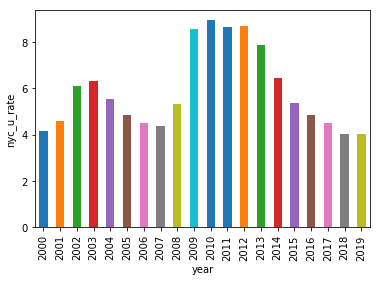

<Figure size 1080x1152 with 0 Axes>

In [46]:
nyc_unemployment_chart = nyc_mean_by_year.plot(kind='bar')

nyc_unemployment_chart.set_xlabel("year")
nyc_unemployment_chart.set_ylabel("nyc_u_rate")
nyc_unemployment_chart = plt.figure(figsize=(15,16))
plt.show()

In [47]:
unemployment_comparison = pd.merge(df_TX, df_nyc, on = 'year')
unemployment_comparison

,year,period_x,TX_unemployed,TX_labor_pool,TX_u_rate,TX_wage,date_x,period_y,nyc_u_rate,nyc_lbr_pool,nyc_wage,date_y
0,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M12,4.4,11502943,27.997704,2007-12-01
1,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M11,4.2,11506230,27.247387,2007-11-01
2,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M10,4.3,11451352,27.188924,2007-10-01
3,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M09,4.4,11406632,27.356028,2007-09-01
4,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M08,4.5,11475871,27.222017,2007-08-01
5,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M07,4.9,11610239,27.512293,2007-07-01
6,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M06,4.4,11508241,27.162935,2007-06-01
7,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M05,4.1,11346211,27.003579,2007-05-01
8,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M04,4.0,11320972,27.507567,2007-04-01
9,2007,M01,142322.0,3085715.0,4.6,22.256440,2007-01-01,M03,4.2,11370059,27.206743,2007-03-01


In [48]:
unemployment_by_year = unemployment_comparison.groupby('year')

u_rates_by_year = unemployment_by_year['nyc_u_rate', 'TX_u_rate'].mean()

print(u_rates_by_year)

      nyc_u_rate  TX_u_rate
year                       
2007    4.391667   4.233333
2008    5.325000   4.716667
2009    8.541667   7.641667
2010    8.933333   8.391667
2011    8.625000   7.900000
2012    8.691667   6.716667
2013    7.866667   6.175000
2014    6.450000   5.016667
2015    5.375000   4.683333
2016    4.841667   5.350000
2017    4.525000   5.041667
2018    4.033333   4.283333
2019    4.025000   3.900000


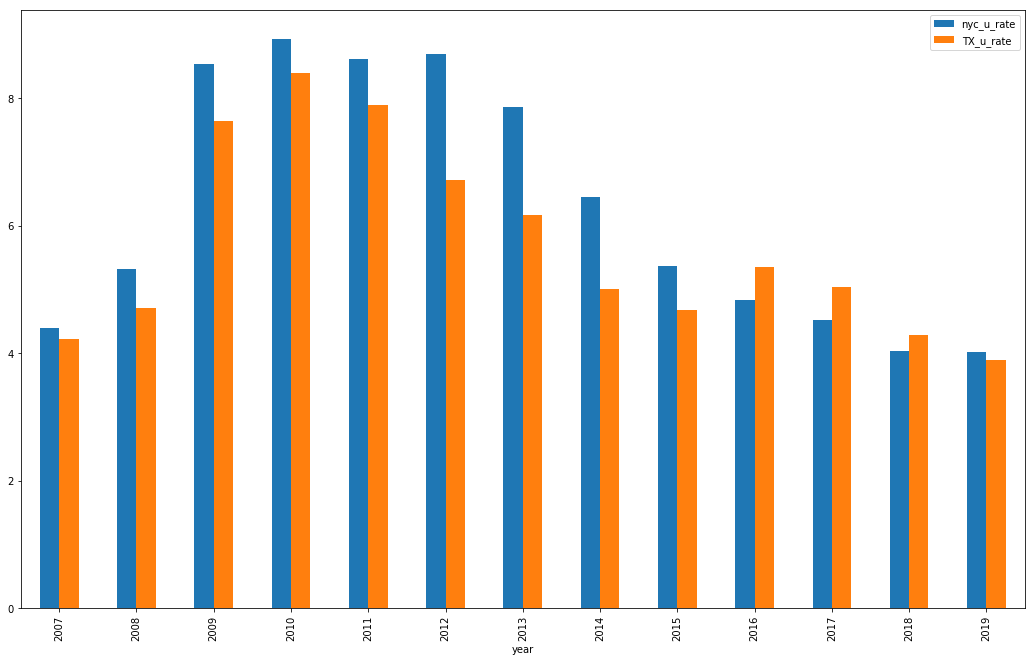

In [68]:
unemployment_chart = u_rates_by_year.plot(kind='bar', figsize=(18,11))

plt.show()

In [50]:
wages_by_year = unemployment_by_year['nyc_wage', 'TX_wage'].mean()

wages_by_year

,nyc_wage,TX_wage
year,,
2007,27.390231,22.993641
2008,28.956136,23.697867
2009,28.993113,24.091709
2010,29.243922,24.271174
2011,29.188165,24.568850
2012,29.534722,24.643242
2013,29.896563,25.302747
2014,30.289020,26.363259
2015,31.381210,27.087450


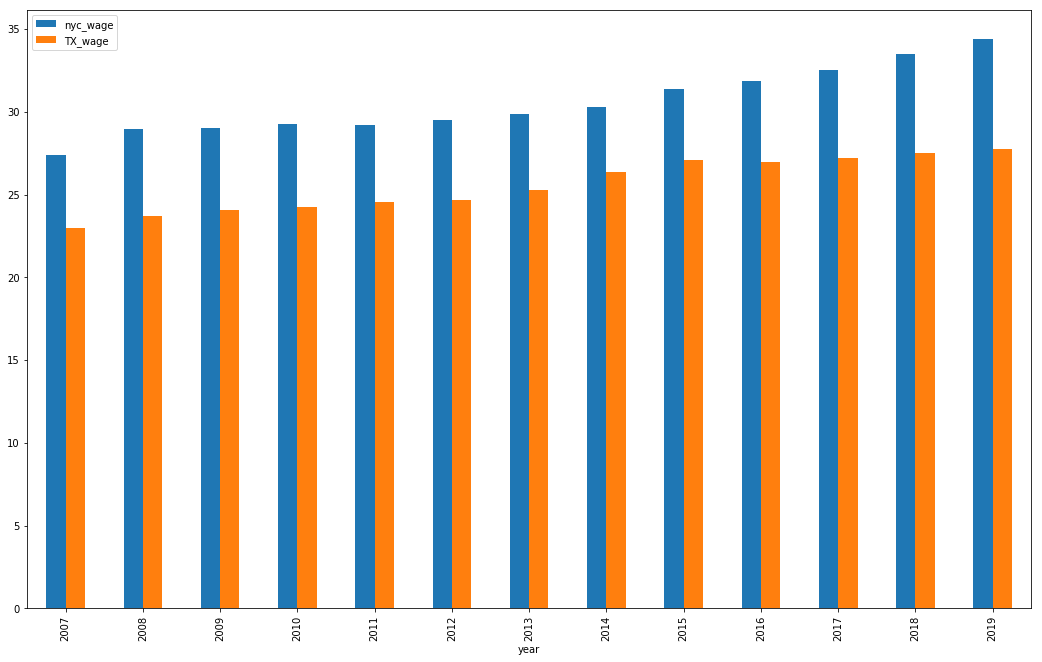

In [65]:
wages_chart = wages_by_year.plot(kind='bar',figsize = (18,11))
plt.show()

In [100]:
unemployment_by_year
unemployment_by_year.
unemployment_by_year['nyc_lbr_pool'] = unemployment_by_year.nyc_lbr_pool.astype(float)

AttributeError: Cannot access callable attribute 'astype' of 'SeriesGroupBy' objects, try using the 'apply' method

In [81]:
labor_pool = unemployment_by_year['TX_labor_pool','nyc_lbr_pool'].mean()
labor_pool

,TX_labor_pool
year,
2007,3.112068e+06
2008,3.190509e+06
2009,3.259668e+06
2010,3.379449e+06
2011,3.463815e+06
2012,3.541040e+06
2013,3.612847e+06
2014,3.681461e+06
2015,3.689325e+06
